In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

In [18]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("buena2.txt", delimiter="\t",skip_footer=1)

d_sensor = array1
print("Sensor 1:",d_sensor)
print(len(d_sensor))


Sensor 1: [1226. 1246. 1266. ...  881.  881.  882.]
14601


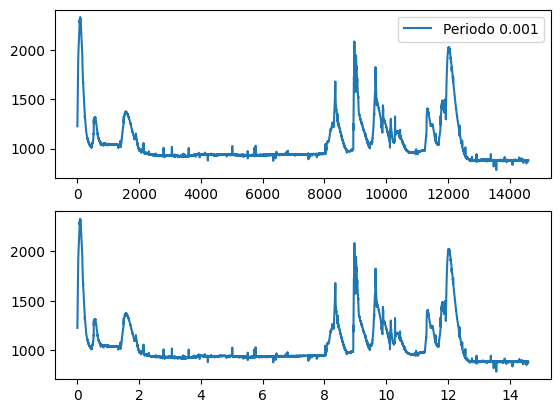

In [19]:

Fs=1000; #Frecuencia de muestreo
T1=1/Fs

M = len(d_sensor)
n = np.arange(0,M)

t = n/Fs

#Señal Buena postura
fig,axes = plt.subplots(2)
axes[0].plot(n,d_sensor,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(t,d_sensor,label=f"Periodo {T1}")


## DFT de N puntos

In [20]:
#transformada de fourier FFT
N1 = len(d_sensor)

D1 = np.fft.fft(d_sensor,N1)


D1 = D1[0:(N1//2)]

In [21]:
#magnitud para la señal en frecuencia
D1m = np.abs(D1)
D1m = np.round(D1m,3)

#frecuencias
F = np.linspace(0, Fs/2, N1//2)

#tiempo
t = n/Fs 

Text(0.5, 1.0, ' Análisis en frecuencia de la señal EMG')

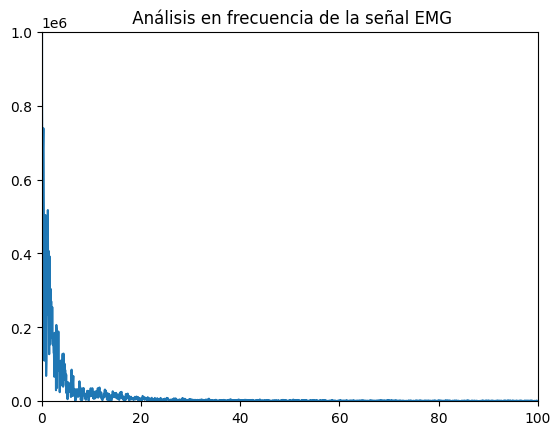

In [23]:
plt.plot(F,D1m)
plt.xlim([0,100])
plt.ylim([0,1.0*1e6])
plt.title(" Análisis en frecuencia de la señal EMG")

## Diseñar el filtro FIR pasa bajos

In [24]:
#Para el diseño del FIR vamos a incluir el diseño con la ventaba Blackman. 
#longitud de la ventana
M = 100
#frecuencia de corte en Hz
Fc = 20

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/Fs

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='blackman', fs=Fs)
w = np.round(w,3)

In [25]:
nm = np.arange(M)
W = np.fft.fft(w,N1)
W = np.round(W[0:N1//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N1//2])
Ry = np.linspace(0,1,N1//2)

Text(0.5, 1.0, ' Análisis en frecuencia')

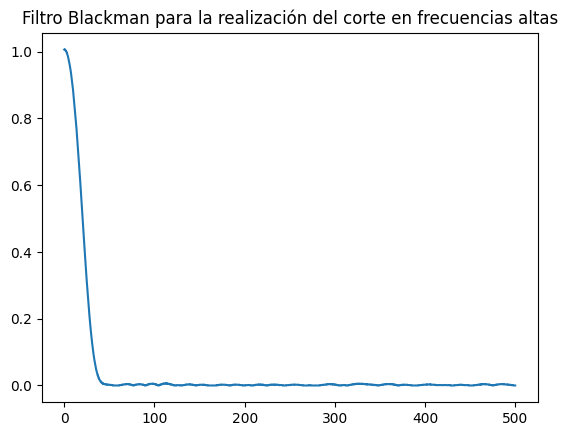

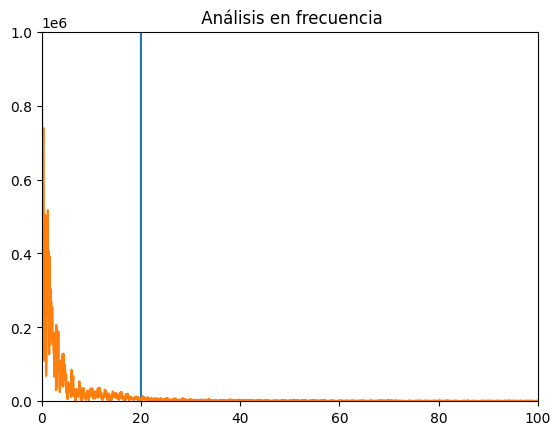

In [27]:
Ry = np.linspace(0,np.max(D1m),N1//2) #el eje y

plt.figure()
plt.plot(F,Wm)
plt.title("Filtro Blackman para la realización del corte en frecuencias altas")

plt.figure()
plt.plot(Rx,Ry)
plt.plot(F,D1m)
plt.xlim([0,100])
plt.ylim([0,1.0*1e6])
plt.title(" Análisis en frecuencia")

### Aplicación del filtro FIR a la entrada 

In [28]:
#Aplicacion de los filtros con la señal original en el tiempo para realizar la convolución de las señales
y1 = lfilter(w, np.array(1),d_sensor)

#Una vez realizada la convolución de las señales en el tiempo se realiza la DFT con el comando FFT para evaluar la salida filtrada por el 
#pasabajos.
Y1 = np.fft.fft(y1,N1)
Y1 = np.round(Y1[0:N1//2],3)
Ym1 = np.abs(Y1)



Text(0.5, 1.0, ' Análisis en frecuencia realizado el corte')

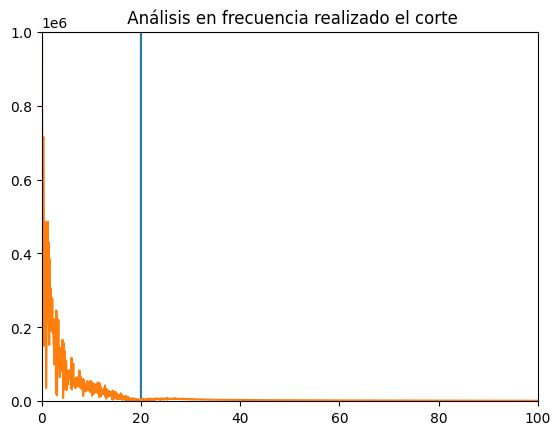

In [30]:
Ry = np.linspace(0,np.max(D1m),N1//2) #el eje y

plt.plot(Rx,Ry)
plt.plot(F,Ym1)
plt.xlim([0,100])
plt.ylim([0,1.0*1e6])
plt.title(" Análisis en frecuencia realizado el corte")

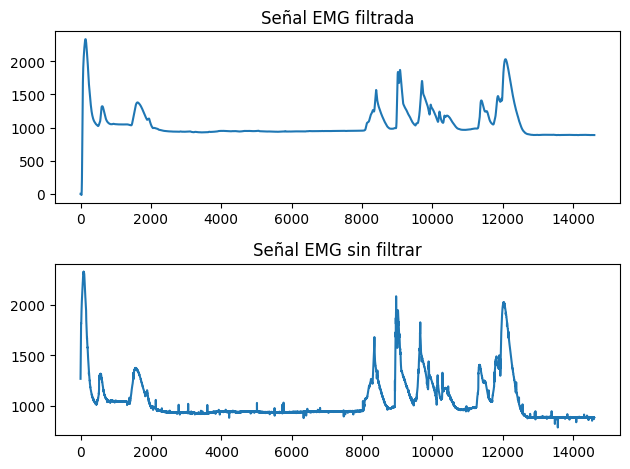

In [33]:

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(y1,label="bpm=80")
#ax1.Legend()
#ax1.set_xlim(0.2,2.8)
#ax1.set_ylim(400,700)
ax1.set_title('Señal EMG filtrada')

# Trazar en la segunda subparcela
ax2.plot( d_sensor,label="bpm=80")
#ax2.Legend()
ax2.set_title('Señal EMG sin filtrar')

# Ajustar el espaciado entre subparcelas
plt.tight_layout()

# Mostrar los gráficos

plt.show()

In [34]:
print(y1)
print(len(y1))
print(d_sensor)
print(len(d_sensor))

[  0.      0.      0.    ... 886.303 886.4   886.466]
14601
[1266. 1298. 1330. ...  881.  881.  882.]
14599


In [ ]:
filename = "ecg.txt"

with open(filename, 'w') as file:
    for element in y1:
        file.write(str(element) + "\n")

print("guardado en el archivo de texto.")

guardado en el archivo de texto.
